In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [35]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


In [36]:
data.shape

(768, 9)

In [37]:
data.isnull().values.any()

False

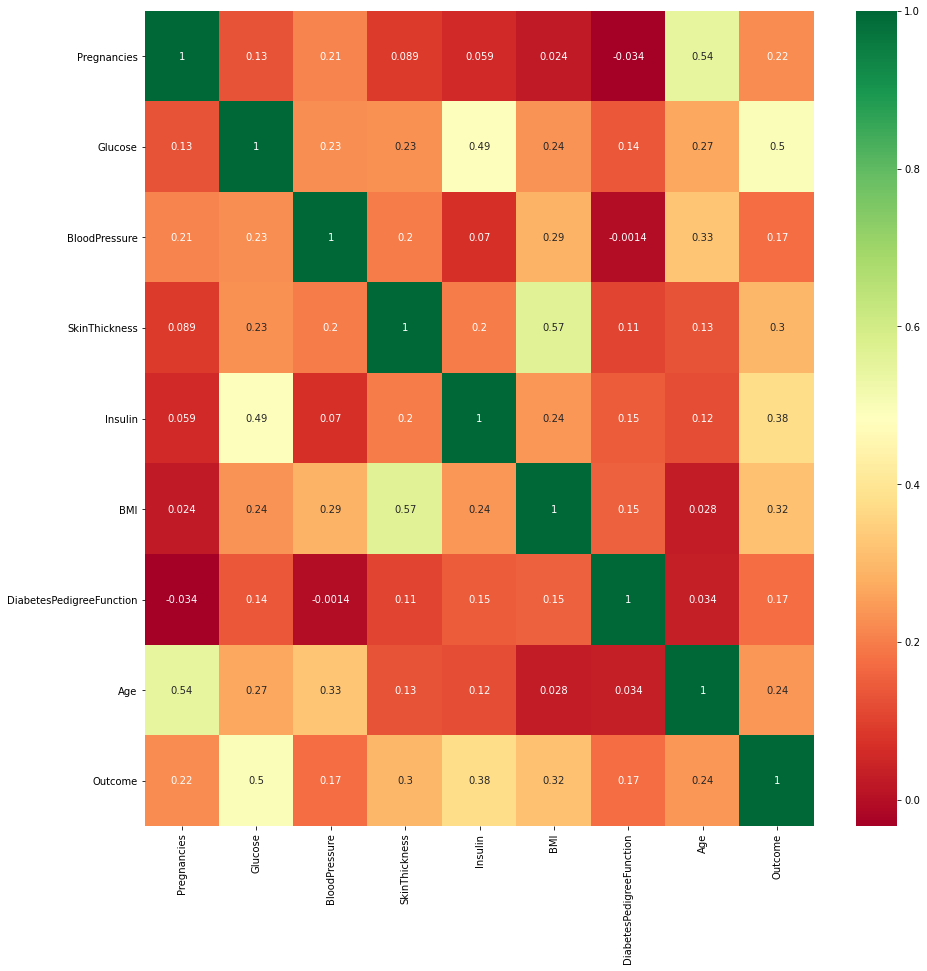

In [38]:
import seaborn as sns
corrmat=data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [39]:

diabetes_true_count = len(data.loc[data['Outcome'] == True])
diabetes_false_count = len(data.loc[data['Outcome'] == False])

In [40]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [41]:
from sklearn.model_selection import train_test_split
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [42]:
X_train, y_train,X_test,y_test =train_test_split(X, y, test_size = 0.30, random_state=10)

In [43]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BP: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing pregnancies: {0}".format(len(data.loc[data['Pregnancies']==0])))

total number of rows : 768
number of rows missing glucose: 0
number of rows missing BP: 0
number of rows missing Insulin: 0
number of rows missing BMI: 0
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 0
number of rows missing pregnancies: 111


In [50]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [51]:
classifier = xgboost.XGBClassifier()

In [53]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [54]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [55]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [56]:

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    3.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.8s finished



 Time taken: 0 hours 0 minutes and 4.64 seconds.


In [57]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [59]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

[03:12:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:12:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:12:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [60]:
score

array([0.88311688, 0.88311688, 0.83116883, 0.85714286, 0.81818182,
       0.8961039 , 0.90909091, 0.8961039 , 0.90789474, 0.89473684])

In [61]:
score.mean()

0.8776657552973341